## **Simple CNN Implemented using Keras.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

## **Task 1: Data Understanding and Visualization:**

In [3]:
# Define paths
train_dir = '/content/drive/MyDrive/al and ML/week 5/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/al and ML/week 5/FruitinAmazon/test'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

*   Get the list of class directories from the train folder.
*   Select one image randomly from each class.
*   Display the images in a grid format with two rows using matplotlib.

In [4]:
import os
import random
import matplotlib.pyplot as plt

def visualize_data(train_data_dir):
    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

['pupunha', 'acai', 'guarana', 'graviola', 'tucuma', 'cupuacu']


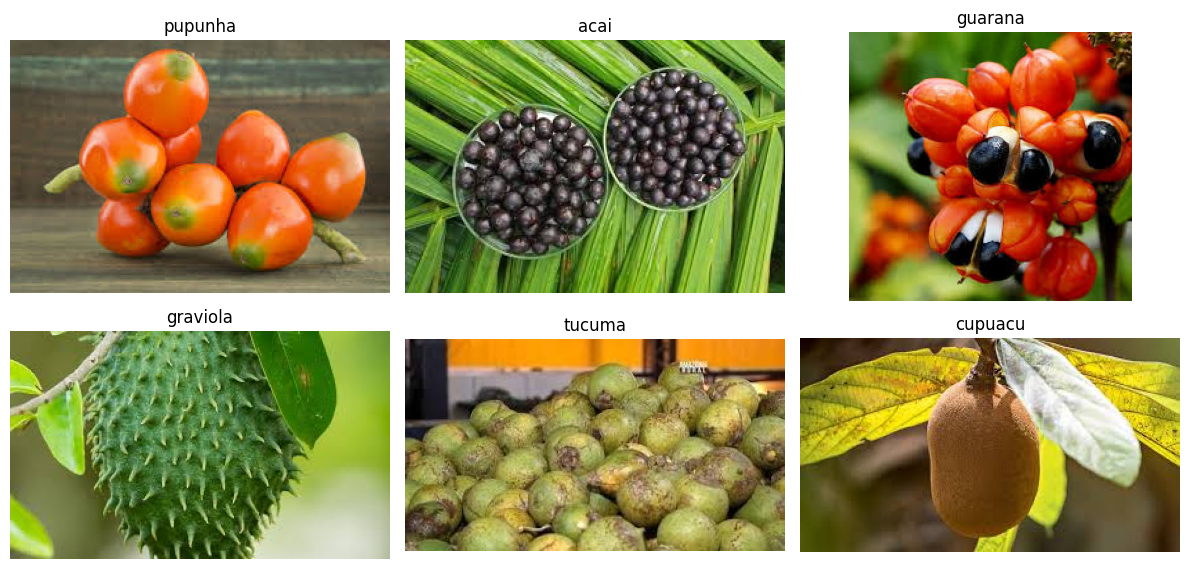

In [5]:
visualize_data(train_dir)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

Hint:
- Iterate through each class subdirectory and check if each image is valid.
- Use the Image.open() function to attempt to load each image.
- If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".
- Maintain a list of all corrupted image paths for reporting.

Expected Output: No corrupted images found.

In [6]:
import os
from PIL import Image

def check_and_remove_corrupted_images(train_folder):
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Verify image format
                        img.verify()
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images removed: {len(corrupted_images)}")


check_and_remove_corrupted_images(train_dir)

No corrupted images found.


In [7]:
import tensorflow as tf
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [8]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax') # 6 for 6 classes of fruits
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,  # Use val_ds for validation
    callbacks=callbacks  # Use callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.2106 - loss: 2.4029
Epoch 1: val_loss improved from inf to 1.47201, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 721ms/step - accuracy: 0.2066 - loss: 2.4739 - val_accuracy: 0.5556 - val_loss: 1.4720
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.1447 - loss: 1.8443
Epoch 2: val_loss did not improve from 1.47201
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.1467 - loss: 1.8416 - val_accuracy: 0.0000e+00 - val_loss: 2.1121
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.1834 - loss: 1.7157
Epoch 3: val_loss did not improve from 1.47201
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.1931 - loss: 1.7106 - val_accuracy: 0.3333 - val_loss: 1.6328
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.3785 - loss: 1.5871
Epoch 4: val_loss improved from 1.47201 to 1.27524, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 968ms/step - accuracy: 0.3880 - loss: 1.5795 - val_accuracy: 0.7222 - val_loss: 1.2752
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.4554 - loss: 1.4164
Epoch 5: val_loss improved from 1.27524 to 1.01373, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 608ms/step - accuracy: 0.4527 - loss: 1.4121 - val_accuracy: 0.7778 - val_loss: 1.0137
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.4763 - loss: 1.2267
Epoch 6: val_loss did not improve from 1.01373
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 0.4683 - loss: 1.2286 - val_accuracy: 0.6667 - val_loss: 1.1263
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.7205 - loss: 1.0220
Epoch 7: val_loss did not improve from 1.01373
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.7174 - loss: 1.0259 - val_accuracy: 0.2222 - val_loss: 1.4478
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.6997 - loss: 0.8988
Epoch 8: val_loss improved from 1.01373 to 0.89600, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.7018 - loss: 0.8933 - val_accuracy: 0.7222 - val_loss: 0.8960
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7969 - loss: 0.6414
Epoch 9: val_loss improved from 0.89600 to 0.78403, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 604ms/step - accuracy: 0.7852 - loss: 0.6453 - val_accuracy: 0.6667 - val_loss: 0.7840
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.9103 - loss: 0.4566
Epoch 10: val_loss did not improve from 0.78403
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 852ms/step - accuracy: 0.9084 - loss: 0.4589 - val_accuracy: 0.5556 - val_loss: 1.0288
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.9294 - loss: 0.3779
Epoch 11: val_loss improved from 0.78403 to 0.75975, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.9332 - loss: 0.3666 - val_accuracy: 0.7222 - val_loss: 0.7597
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9091 - loss: 0.2585
Epoch 12: val_loss improved from 0.75975 to 0.44182, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - accuracy: 0.9145 - loss: 0.2543 - val_accuracy: 0.8889 - val_loss: 0.4418
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9797 - loss: 0.1384
Epoch 13: val_loss did not improve from 0.44182
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 0.9813 - loss: 0.1364 - val_accuracy: 0.7778 - val_loss: 0.5760
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9902 - loss: 0.0883
Epoch 14: val_loss did not improve from 0.44182
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.9891 - loss: 0.0889 - val_accuracy: 0.7222 - val_loss: 0.7463
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9902 - loss: 0.0705
Epoch 15: val_loss did not improve from 0.44182
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 782ms/step - accuracy: 0.9891 - loss: 0.0705 - val_accuracy: 0.8889 - val_loss: 0.4898
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 1.0000 - loss: 0.0556
Epoch 16: val_loss improved from 0.44182 to 0.26248,

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step - accuracy: 1.0000 - loss: 0.0552 - val_accuracy: 0.9444 - val_loss: 0.2625
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 1.0000 - loss: 0.0292
Epoch 17: val_loss improved from 0.26248 to 0.23411, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 1.0000 - loss: 0.0292 - val_accuracy: 0.8333 - val_loss: 0.2341
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 0.0145
Epoch 18: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.7778 - val_loss: 0.3866
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 1.0000 - loss: 0.0142
Epoch 19: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.8333 - val_loss: 0.4472
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 20: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 851ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.8333 - val_loss: 0.4860
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 1.0000 - loss: 0.0055
Epoch 21: val_loss did not improve from 0.23411
3/3 

In [11]:
# Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [12]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7667 - loss: 1.0254
Test Loss: 1.0253689289093018
Test Accuracy: 0.7666666507720947


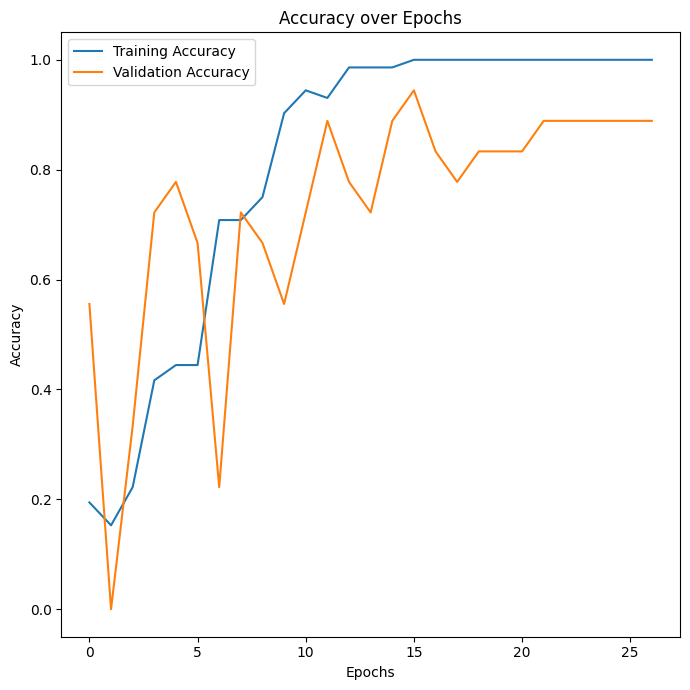

In [13]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

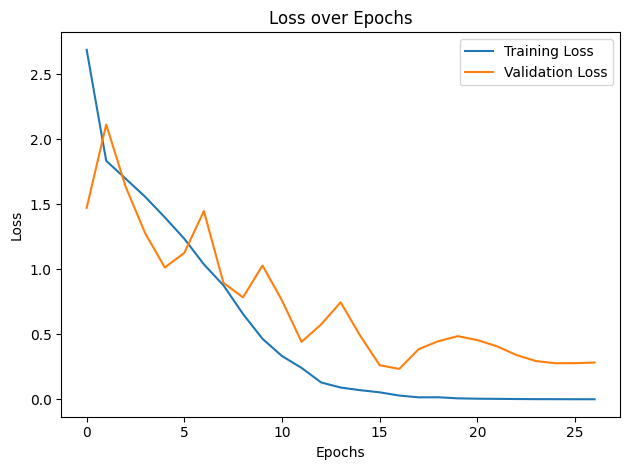

In [14]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

Use Data Augmentation to increase the number of training image.
Use deeper model with BN and DropOut layer as presented above.
Understand the Model Summary and Training Behavior.

In [15]:
data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]

def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images

In [16]:
# Define an improved CNN model with Batch Normalization and Dropout
modelcnn2 = keras.Sequential([

    # Data augmentation applied using Lambda layer
    layers.Lambda(data_augmentation, input_shape=(128,128, 3)),

    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compile the model
modelcnn2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
# Display model summary
modelcnn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 8,485,574 (32.37 MB)

 Trainable params: 8,484,614 (32.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [19]:
# Train the model
cnn_history = modelcnn2.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=32,  # Batch size
    callbacks=callbacks  # Callbacks for early stopping and saving the best model
    # jit_compile =False # Remove this line - it's not a valid argument for model.fit
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2037 - loss: 3.0655
Epoch 1: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2118 - loss: 3.0420 - val_accuracy: 0.0000e+00 - val_loss: 1.7843
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5098 - loss: 1.6015
Epoch 2: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5109 - loss: 1.6218 - val_accuracy: 0.0000e+00 - val_loss: 1.8152
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5995 - loss: 1.3451
Epoch 3: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6024 - loss: 1.3219 - val_accuracy: 0.0000e+00 - val_loss: 1.9758
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5891 - loss: 1.2811
Epoch 4: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5946 - loss: 1.2534 - val_accuracy: 0.0000e+00 - val_loss: 2.1718
Epoch 5/250
3/3 ━━

In [20]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelcnn2.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.1667 - loss: 1.8032


Test Loss: 1.8032, Test Accuracy: 0.1667


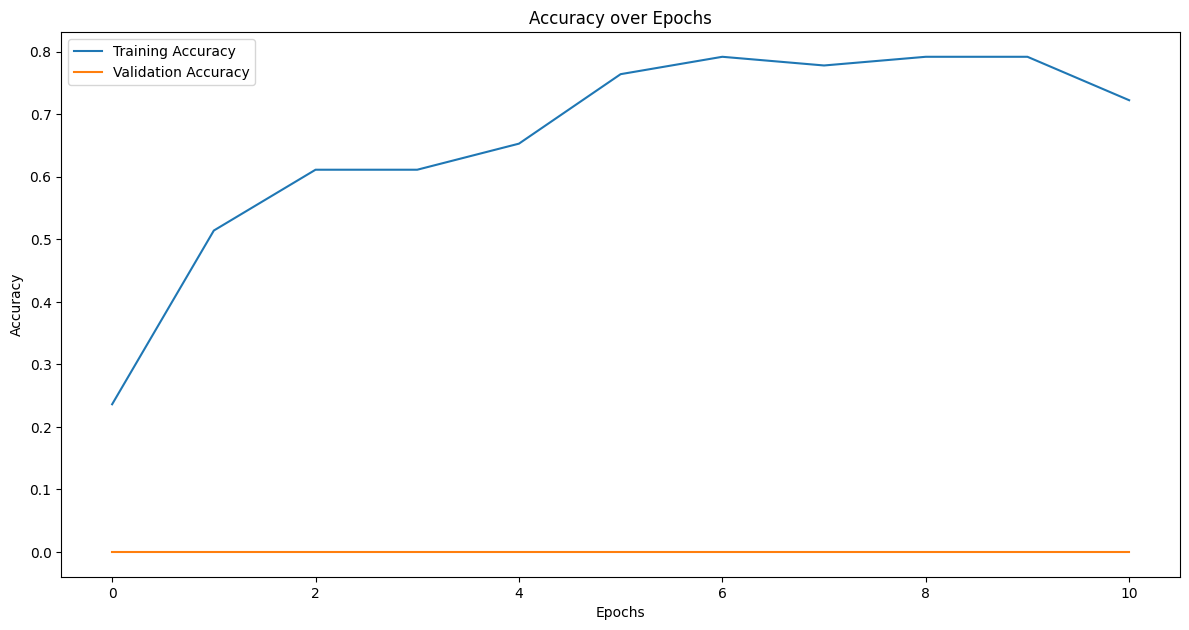

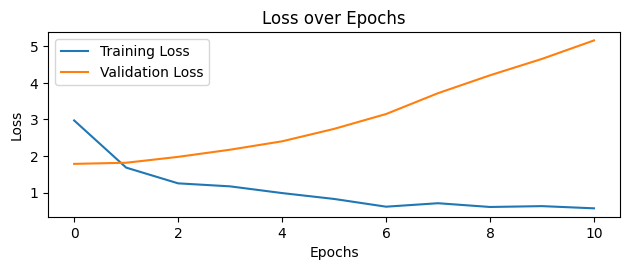

In [21]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### **MobilenetV2**

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Define input shape
input_shape = (128, 128, 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)  # Adjust to your number of classes

# Create the model
modelnetv2 = Model(inputs, outputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
from tensorflow.keras.optimizers import Adam

modelnetv2.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
vnet2_history = modelnetv2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.2095 - loss: 2.5129
Epoch 1: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2127 - loss: 2.4516 - val_accuracy: 0.5556 - val_loss: 1.1590
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5984 - loss: 1.0613
Epoch 2: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.6085 - loss: 1.0417 - val_accuracy: 0.8889 - val_loss: 0.6452
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8079 - loss: 0.5815
Epoch 3: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.8212 - loss: 0.5593 - val_accuracy: 0.8333 - val_loss: 0.4919
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9502 - loss: 0.2229
Epoch 4: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.9488 - loss: 0.2236 - val_accuracy: 0.8889 - val_loss: 0.3799
Epoch 5/250
3/

In [25]:
modelnetv2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,752,212 (10.50 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 329,486 (1.26 MB)

In [26]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelnetv2.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.8333 - loss: 0.4647


Test Loss: 0.4647, Test Accuracy: 0.8333


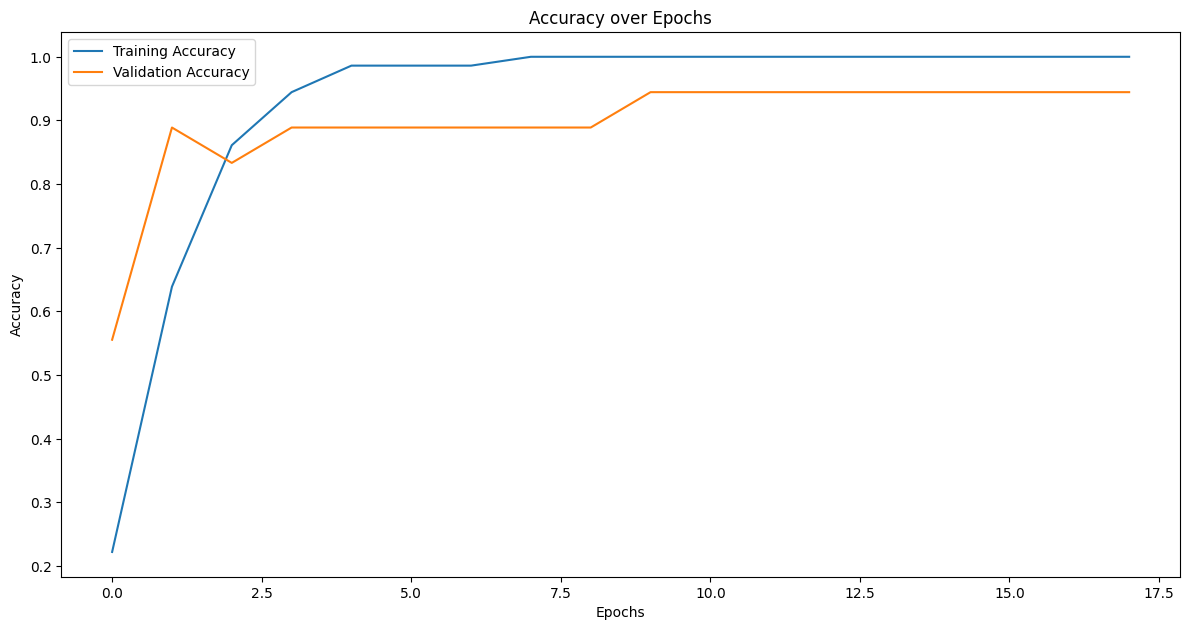

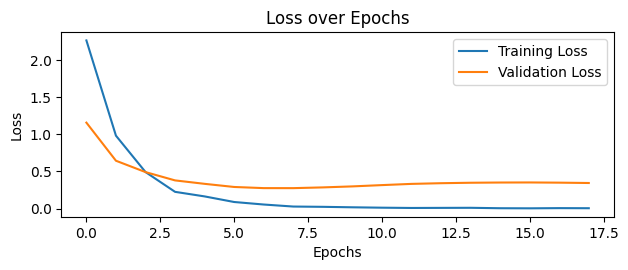

In [27]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(vnet2_history.history['accuracy'], label='Training Accuracy')
plt.plot(vnet2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(vnet2_history.history['loss'], label='Training Loss')
plt.plot(vnet2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **VGG16**

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

In [29]:
# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
for layer in base_model.layers:
  layer.trainable = False


In [31]:
# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x) # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x) # Output layer for 10 classes (with softmax for multi-class classification)

In [32]:
from tensorflow.keras.models import Model
# Create the final model
modelvgg16 = Model(inputs=base_model.input, outputs=x)

In [33]:
from tensorflow.keras.optimizers import Adam
# Compile the model
modelvgg16.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
vgg_history = modelvgg16.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0532 - loss: 2.4762
Epoch 1: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.0642 - loss: 2.4449 - val_accuracy: 0.6111 - val_loss: 1.4868
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4190 - loss: 1.5870
Epoch 2: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4253 - loss: 1.5775 - val_accuracy: 0.7778 - val_loss: 1.0000
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6053 - loss: 1.3141
Epoch 3: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.6033 - loss: 1.3103 - val_accuracy: 0.6111 - val_loss: 1.0055
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8166 - loss: 1.0708
Epoch 4: val_loss did not improve from 0.23411
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.8069 - loss: 1.0668 - val_accuracy: 0.6111 - val_loss: 1.2054
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━

In [35]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,              # No shuffling for consistent evaluation
)

# Apply the same normalization as train/val
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model on the test dataset
test_loss, test_accuracy = modelvgg16.evaluate(test_ds)
print(f"\n\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 1.4602


Test Loss: 1.4602, Test Accuracy: 0.5000


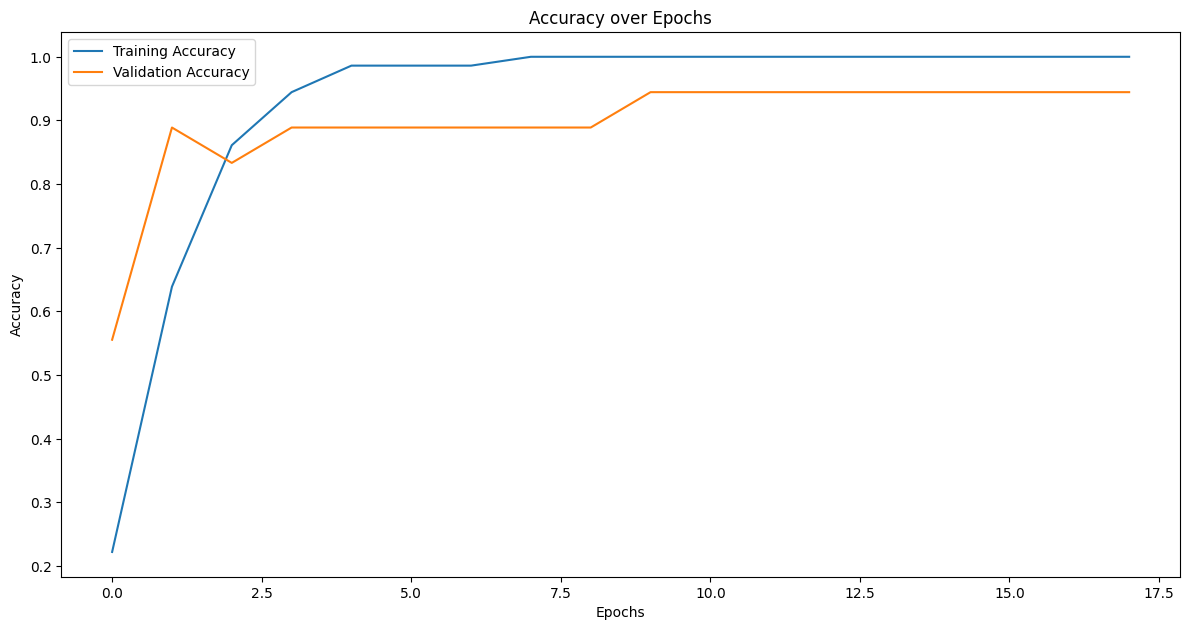

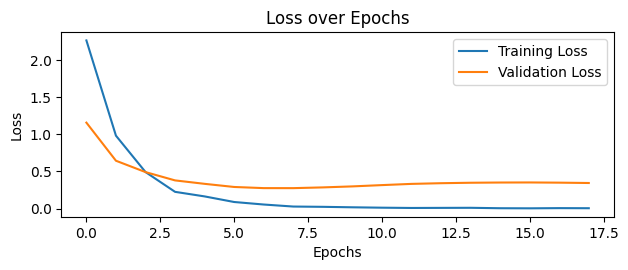

In [36]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 12))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(vnet2_history.history['accuracy'], label='Training Accuracy')
plt.plot(vnet2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(vnet2_history.history['loss'], label='Training Loss')
plt.plot(vnet2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()